<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import datetime
import numpy as np
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [148]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv')

In [149]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [150]:
# df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S') 
# df['End Date'] = pd.to_datetime(df['End Date'], format='%Y-%m-%d %H:%M:%S')

In [151]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StartDateTime  5081 non-null   object 
 1   Total kWh      5081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.5+ KB


In [153]:
check_nan_in_df = df.isnull()
print (check_nan_in_df)

      StartDateTime  Total kWh
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
5076          False      False
5077          False      False
5078          False      False
5079          False      False
5080          False      False

[5081 rows x 2 columns]


In [154]:
df1 = df.dropna()

In [155]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [156]:
# df1['StartDateTime'] = pd.to_datetime(df1['Start Date'].astype(str) + ' ' +df1['Start Time'].astype(str))

In [157]:
# df1['EndDateTime'] = pd.to_datetime(df1['End Date'].astype(str) + ' ' +df1['End Time'].astype(str))

In [158]:
# df1 = df1.drop(columns=['_id','CP ID','Start Date', 'Start Time','End Date','End Time'])
# df1=df1[['StartDateTime','EndDateTime','Connector','Site','Model','Total kWh']]
# df1

In [159]:
# df1['Duration'] = df1['EndDateTime'] - df1['StartDateTime']
# df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'h')

In [160]:
# #df1 = df1.drop(columns=['StartDateTime','EndDateTime'])
# df1 = df1.drop(columns=['EndDateTime','Duration','Site','Model'])
df1=df1[['StartDateTime','Total kWh']]
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [161]:
# delete duplicate rows
df1 = df1.drop_duplicates()

In [162]:
df1["StartDateTime"] = pd.to_datetime(df1["StartDateTime"])

df1 = df1.sort_values(by="StartDateTime")

In [163]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [164]:
#df1[~(df1 == 0).all(axis=1)]

#make sure every hour is in the datetime
#df1 = df1.set_index("StartDateTime").resample("1h").last()
#df1 = df1.set_index("StartDateTime").resample("1h").sum()
df1 = df1.set_index("StartDateTime").resample("1min").sum()


df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:01:00,0.00
2016-01-09 07:02:00,0.00
2016-01-09 07:03:00,0.00
2016-01-09 07:04:00,0.00
...,...
2017-12-08 22:56:00,0.00
2017-12-08 22:57:00,0.00
2017-12-08 22:58:00,0.00


In [165]:
df1.dropna(subset=['Total kWh'], how='all', inplace=True)

In [166]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:01:00,0.00
2016-01-09 07:02:00,0.00
2016-01-09 07:03:00,0.00
2016-01-09 07:04:00,0.00
...,...
2017-12-08 22:56:00,0.00
2017-12-08 22:57:00,0.00
2017-12-08 22:58:00,0.00


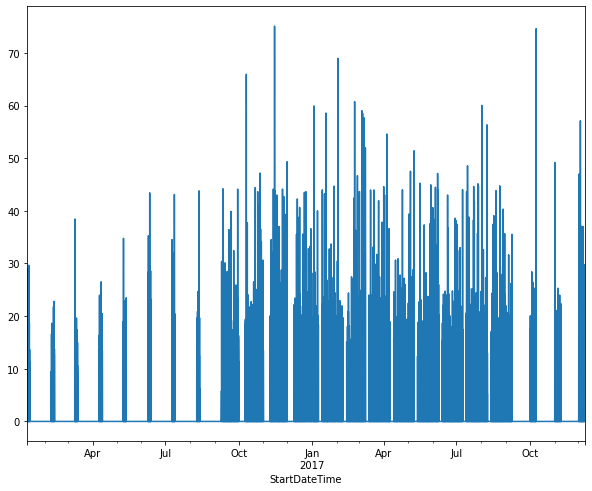

In [167]:
temp = df1['Total kWh']
temp.plot()

In [168]:
#df1 = df1[~(df1 == 0).all(axis=1)]

In [169]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:01:00,0.00
2016-01-09 07:02:00,0.00
2016-01-09 07:03:00,0.00
2016-01-09 07:04:00,0.00
...,...
2017-12-08 22:56:00,0.00
2017-12-08 22:57:00,0.00
2017-12-08 22:58:00,0.00


In [170]:
df1['Total kWh'].round(3)

StartDateTime
2016-01-09 07:00:00    3.87
2016-01-09 07:01:00    0.00
2016-01-09 07:02:00    0.00
2016-01-09 07:03:00    0.00
2016-01-09 07:04:00    0.00
                       ... 
2017-12-08 22:56:00    0.00
2017-12-08 22:57:00    0.00
2017-12-08 22:58:00    0.00
2017-12-08 22:59:00    0.00
2017-12-08 23:00:00    1.74
Freq: T, Name: Total kWh, Length: 1007521, dtype: float64

In [171]:
#df1.to_csv("/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv")

In [172]:
def df1_to_X_y(df1, window_size=5):
  df1_as_np = df1.to_numpy()
  X= []
  y= []
  for i in range(len(df1_as_np)- window_size):
     row = [[a] for a in df1_as_np[i:i+5]]
     X.append(row) 
     label = df1_as_np[i+5]
     y.append(label) 
  return np.array(X), np.array(y)

In [173]:
WINDOW_SIZE = 5
X,y = df1_to_X_y(temp,WINDOW_SIZE)
X.shape, y.shape

((1007516, 5, 1), (1007516,))

In [174]:
X_train, y_train = X[:6000], y[:6000]
X_val, y_val = X[6000:6500],y[6000:6500]
X_test, y_test = X[6500:],y[6500:]
X_train.shape , y_train.shape, X_val.shape, X_test.shape, y_test.shape

((6000, 5, 1), (6000,), (500, 5, 1), (1001016, 5, 1), (1001016,))

In [175]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((5, 1)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1.summary()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64,return_sequences = True))
model1.add(LSTM(32,return_sequences = True))
model1.add(LSTM(16))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_10 (LSTM)              (None, 5, 32)             12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,593
Trainable params: 32,593
Non-trainable params: 0
_________________________________________________________________


In [176]:
#model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [177]:
#model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[cp1])

Epoch 1/25
184/188 [============================>.] - ETA: 0s - loss: 1.2203 - root_mean_squared_error: 1.1047

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 17s 69ms/step - loss: 1.2000 - root_mean_squared_error: 1.0954 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 2/25
188/188 [==============================] - 1s 7ms/step - loss: 1.1966 - root_mean_squared_error: 1.0939 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 3/25
188/188 [==============================] - 1s 7ms/step - loss: 1.1959 - root_mean_squared_error: 1.0936 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 4/25
188/188 [==============================] - 1s 7ms/step - loss: 1.1959 - root_mean_squared_error: 1.0936 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 5/25
188/188 [==============================] - 1s 7ms/step - loss: 1.1958 - root_mean_squared_error: 1.0935 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 6/25
188/188 [==============================] - 1s 7ms/step - loss: 1.1958 - root_mean_squared_error: 1.0935 - val_loss: 0.0076 - val_root_mean

In [178]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.001866,0.0
1,0.085526,0.0
2,0.085526,0.0
3,0.085526,0.0
4,0.085526,0.0
...,...,...
5995,0.085526,0.0
5996,0.085526,0.0
5997,0.085526,0.0
5998,0.085526,0.0


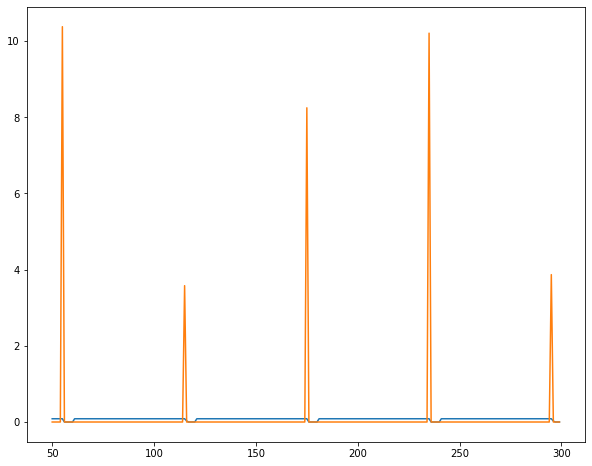

In [179]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:300])
plt.plot(train_results['Actuals'][50:300])

In [180]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,0.085526,0.0
1,0.085526,0.0
2,0.085526,0.0
3,0.085526,0.0
4,0.085526,0.0
...,...,...
495,0.085526,0.0
496,0.085526,0.0
497,0.085526,0.0
498,0.085526,0.0


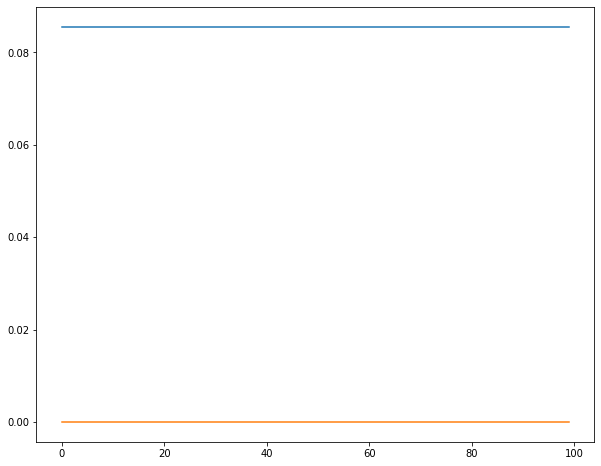

In [181]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [182]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,0.085526,0.00
1,0.085526,0.00
2,0.085526,0.00
3,0.085526,0.00
4,0.085526,0.00
...,...,...
1001011,0.085526,0.00
1001012,0.085526,0.00
1001013,0.085526,0.00
1001014,0.085526,0.00


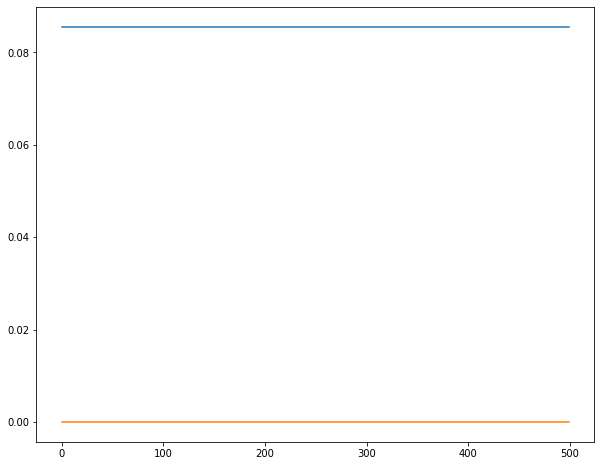

In [183]:
plt.plot(test_results['Test Predictions'][:500])  # blue
plt.plot(test_results['Actuals'][:500]) #red